# Simple Linear Regression

## Predicting Student Performance Based on Study Hours

### Objective: 

Develop a predictive model using linear regression to forecast students' exam scores based on the number of hours they study.

### Context: 

In the education industry, understanding the factors that influence student performance is crucial for developing effective teaching strategies and improving student outcomes. By leveraging data on study hours and corresponding exam scores, we can create a model to predict future performance and provide insights for educators to enhance their teaching methods.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/BK_Birla/main/student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Dataset Description:

The dataset consists of two columns:

**Hours**:

Description: The number of hours a student studies per week.

Type: Numeric

Range: 1.1 to 9.2 hours

Example Values: 2.5, 5.1, 3.2

**Scores**:

Description: The score a student achieves in the exam.

Type: Numeric

Range: 17 to 95

Example Values: 21, 47, 27

# Problem Statement

Develop a linear regression model to predict students' exam scores based on the number of hours they study. The model should help educators identify how much study time is generally required to achieve a certain score, thereby aiding in the design of effective study plans and interventions for students.

In [3]:
df.shape

(25, 2)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# summary of all numeric columns
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


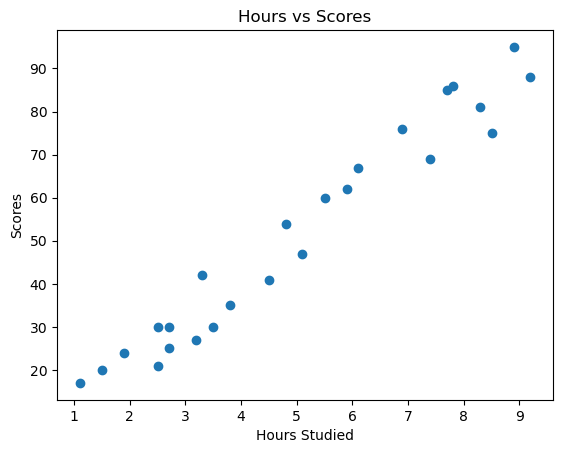

In [6]:
# Scatter plot of Hours vs Scores
plt.scatter(df['Hours'], df['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

In [8]:
# Correlation check
correlation = df.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
X = df[['Hours']] # Independent Variable
y = df['Scores'] # Dependent Variable

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


In [25]:
X_train.head()

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1


In [26]:
# Modeling

from sklearn.linear_model import LinearRegression # import

lr = LinearRegression() # create an object
lr.fit(X_train, y_train) # fit means study

LinearRegression()

In [27]:
lr

LinearRegression()

In [28]:
lr.intercept_ # intercept

2.018160041434683

In [29]:
lr.coef_ # m i.e. Slope

array([9.91065648])

In [ ]:
# y = mx + c
# y = 9.91065648x + 2.018160041434683

# For every 1hr of study, the student shall score additional 9.91%

In [30]:
X_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [31]:
lr.predict(X_test)

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [32]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [35]:
y_pred = lr.predict(X_test)

list(zip(y_test, y_pred))

[(20, 16.884144762398037),
 (27, 33.73226077948984),
 (69, 75.35701799818723),
 (30, 26.794801243040276),
 (62, 60.491033277223885)]

In [36]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))

5.186601709180368
4.183859899002975


In [39]:
print(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_test, y_pred_test))

30.89818237731452
21.5987693072174


In [40]:
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))

5.558613350226342
4.6474476121003665


In [44]:
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)
print(r2_score_train)
print(r2_score_test)

0.9515510725211552
0.9454906892105356


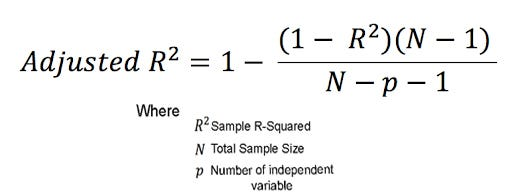

In [45]:
# Adjusted R2 Train
N, p = X_train.shape
# print(N)
# print(p)

num = (1-r2_score_train)*(N-1)
den = N - p - 1
ar2_score_train = 1 - (num/den)
print(ar2_score_train)

0.9488594654389972


In [46]:
# Adjusted R2 Test
N, p = X_test.shape
# print(N)
# print(p)

num = (1-r2_score_test)*(N-1)
den = N - p - 1
ar2_score_test = 1 - (num/den)
print(ar2_score_test)

0.9273209189473808


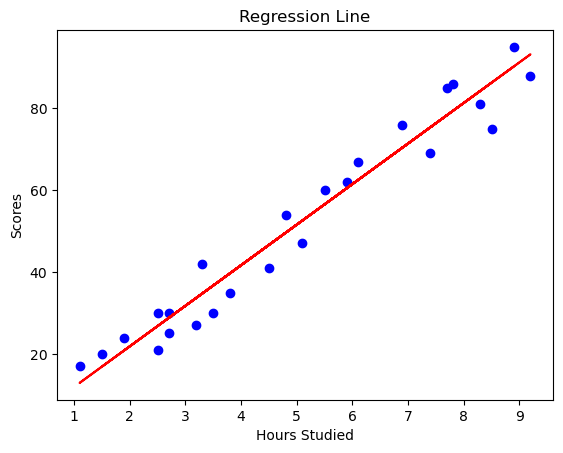

In [48]:
# Plotting the regression line

plt.scatter(X, y, color='blue')
plt.plot(X, lr.predict(X), color='red')
plt.title('Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')1```
plt.show()

# Happy Learning

### Pointers

>Gradient Descent in Linear Regression

>What is significance of R2 and Adjusted R2?

>Implementing AR2 in LR

>LR OLS model

>Concept of Overfitting and Underfitting.